In [46]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats import sem, ttest_ind
from matplotlib import pyplot as plt
%matplotlib notebook

In [83]:
#Read in Fortune 1000 data

employee_count = "fortune_1000_part.csv"
fortune1000_df = pd.read_csv(employee_count)
fortune1000_df.head()

,Company,Revenues ($M),Profits ($M),Assets ($M),Employees,Sector,Industry,City,State
0,Walmart,500343,9862,204522,"2,300,000",Retailing,General Merchandisers,Bentonville,AR
1,Exxon Mobil,244363,19710,348691,"71,200",Energy,Petroleum Refining,Irving,TX
2,Berkshire Hathaway,242137,44940,702095,"377,000",Financials,Insurance: Property and Casualty (Stock),Omaha,NE
3,Apple,229234,48351,375319,"123,000",Technology,"Computers, Office Equipment",Cupertino,CA
4,UnitedHealth Group,201159,10558,139058,"260,000",Health Care,Health Care: Insurance and Managed Care,Minnetonka,MN


In [95]:
# Creating new dataframes by Region
# Region 1 - Cali
# Region 2 - Texas
# Region 3 - NewYork
# Region 4 - North = ME, DE, NH, VT, MA, RI, MD, CT, NJ, PA, DC
# Region 5 - South = SC, VA, WV, NC, MS, AL, AR, GA, LA, FL, KY, TN
# Region 6 - West = WA, OR, MT, WY, ID, UT, CO, AK, HI, NM, AZ, NV
# Region 7 - Midwest = ND, SD, MN, NE, KS, WI, IA, MO, OK, IL, IN, MI, OH

#North = ['ME', 'DE', 'NH', 'VT', 'MA', 'RI', 'MD', 'CT', 'NJ', 'PA', 'DC']
#South = ['SC', 'VA', 'WV', 'NC', 'MS', 'AL', 'AR', 'GA', 'LA', 'FL', 'KY', 'TN', 'PR']
#West = ['WA', 'OR', 'MT', 'WY', 'ID', 'UT', 'CO', 'AK', 'HI', 'NM', 'AZ', 'NV']
#Midwest = ['ND', 'SD', 'MN', 'NE', 'KS', 'WI', 'IA', 'MO', 'OK', 'IL', 'IN', 'MI', 'OH']

In [110]:
#Looks up State value and returns new value in new column called Regions
#If anyone can use code to have a lookup lists above that would be simpler coding

fortune1000_df.loc[fortune1000_df['State'].str.contains('CA'), 'Region'] = 'California'
fortune1000_df.loc[fortune1000_df['State'].str.contains('TX'), 'Region'] = 'Texas'
fortune1000_df.loc[fortune1000_df['State'].str.contains('NY'), 'Region'] = 'NewYork'
fortune1000_df.loc[fortune1000_df['State'].str.contains('ME'), 'Region'] = 'North'
fortune1000_df.loc[fortune1000_df['State'].str.contains('DE'), 'Region'] = 'North'
fortune1000_df.loc[fortune1000_df['State'].str.contains('NH'), 'Region'] = 'North'
fortune1000_df.loc[fortune1000_df['State'].str.contains('VT'), 'Region'] = 'North'
fortune1000_df.loc[fortune1000_df['State'].str.contains('MA'), 'Region'] = 'North'
fortune1000_df.loc[fortune1000_df['State'].str.contains('RI'), 'Region'] = 'North'
fortune1000_df.loc[fortune1000_df['State'].str.contains('MD'), 'Region'] = 'North'
fortune1000_df.loc[fortune1000_df['State'].str.contains('CT'), 'Region'] = 'North'
fortune1000_df.loc[fortune1000_df['State'].str.contains('NJ'), 'Region'] = 'North'
fortune1000_df.loc[fortune1000_df['State'].str.contains('PA'), 'Region'] = 'North'
fortune1000_df.loc[fortune1000_df['State'].str.contains('DC'), 'Region'] = 'North'
fortune1000_df.loc[fortune1000_df['State'].str.contains('SC'), 'Region'] = 'South'
fortune1000_df.loc[fortune1000_df['State'].str.contains('VA'), 'Region'] = 'South'
fortune1000_df.loc[fortune1000_df['State'].str.contains('WV'), 'Region'] = 'South'
fortune1000_df.loc[fortune1000_df['State'].str.contains('NC'), 'Region'] = 'South'
fortune1000_df.loc[fortune1000_df['State'].str.contains('MS'), 'Region'] = 'South'
fortune1000_df.loc[fortune1000_df['State'].str.contains('AL'), 'Region'] = 'South'
fortune1000_df.loc[fortune1000_df['State'].str.contains('AR'), 'Region'] = 'South'
fortune1000_df.loc[fortune1000_df['State'].str.contains('GA'), 'Region'] = 'South'
fortune1000_df.loc[fortune1000_df['State'].str.contains('LA'), 'Region'] = 'South'
fortune1000_df.loc[fortune1000_df['State'].str.contains('FL'), 'Region'] = 'South'
fortune1000_df.loc[fortune1000_df['State'].str.contains('KY'), 'Region'] = 'South'
fortune1000_df.loc[fortune1000_df['State'].str.contains('TN'), 'Region'] = 'South'
fortune1000_df.loc[fortune1000_df['State'].str.contains('Puerto Rico'), 'Region'] = 'South'
fortune1000_df.loc[fortune1000_df['State'].str.contains('WA'), 'Region'] = 'West'
fortune1000_df.loc[fortune1000_df['State'].str.contains('OR'), 'Region'] = 'West'
fortune1000_df.loc[fortune1000_df['State'].str.contains('MT'), 'Region'] = 'West'
fortune1000_df.loc[fortune1000_df['State'].str.contains('WY'), 'Region'] = 'West'
fortune1000_df.loc[fortune1000_df['State'].str.contains('ID'), 'Region'] = 'West'
fortune1000_df.loc[fortune1000_df['State'].str.contains('UT'), 'Region'] = 'West'
fortune1000_df.loc[fortune1000_df['State'].str.contains('CO'), 'Region'] = 'West'
fortune1000_df.loc[fortune1000_df['State'].str.contains('AK'), 'Region'] = 'West'
fortune1000_df.loc[fortune1000_df['State'].str.contains('HI'), 'Region'] = 'West'
fortune1000_df.loc[fortune1000_df['State'].str.contains('NM'), 'Region'] = 'West'
fortune1000_df.loc[fortune1000_df['State'].str.contains('AZ'), 'Region'] = 'West'
fortune1000_df.loc[fortune1000_df['State'].str.contains('NV'), 'Region'] = 'West'
fortune1000_df.loc[fortune1000_df['State'].str.contains('ND'), 'Region'] = 'MidWest'
fortune1000_df.loc[fortune1000_df['State'].str.contains('SD'), 'Region'] = 'MidWest'
fortune1000_df.loc[fortune1000_df['State'].str.contains('MN'), 'Region'] = 'MidWest'
fortune1000_df.loc[fortune1000_df['State'].str.contains('NE'), 'Region'] = 'MidWest'
fortune1000_df.loc[fortune1000_df['State'].str.contains('KS'), 'Region'] = 'MidWest'
fortune1000_df.loc[fortune1000_df['State'].str.contains('WI'), 'Region'] = 'MidWest'
fortune1000_df.loc[fortune1000_df['State'].str.contains('IA'), 'Region'] = 'MidWest'
fortune1000_df.loc[fortune1000_df['State'].str.contains('MO'), 'Region'] = 'MidWest'
fortune1000_df.loc[fortune1000_df['State'].str.contains('OK'), 'Region'] = 'MidWest'
fortune1000_df.loc[fortune1000_df['State'].str.contains('IL'), 'Region'] = 'MidWest'
fortune1000_df.loc[fortune1000_df['State'].str.contains('IN'), 'Region'] = 'MidWest'
fortune1000_df.loc[fortune1000_df['State'].str.contains('MI'), 'Region'] = 'MidWest'
fortune1000_df.loc[fortune1000_df['State'].str.contains('OH'), 'Region'] = 'MidWest'
fortune1000_df.loc[fortune1000_df['State'].str.contains('Michigan'), 'Region'] = 'MidWest'

fortune1000_df.head(50)

,Company,Revenues ($M),Profits ($M),Assets ($M),Employees,Sector,Industry,City,State,Region
0,Walmart,500343,9862,204522,"2,300,000",Retailing,General Merchandisers,Bentonville,AR,South
1,Exxon Mobil,244363,19710,348691,"71,200",Energy,Petroleum Refining,Irving,TX,Texas
2,Berkshire Hathaway,242137,44940,702095,"377,000",Financials,Insurance: Property and Casualty (Stock),Omaha,NE,MidWest
3,Apple,229234,48351,375319,"123,000",Technology,"Computers, Office Equipment",Cupertino,CA,California
4,UnitedHealth Group,201159,10558,139058,"260,000",Health Care,Health Care: Insurance and Managed Care,Minnetonka,MN,MidWest
5,McKesson,198533,5070,60969,"64,500",Wholesalers,Wholesalers: Health Care,SF,CA,California
6,CVS Health,184765,6622,95131,"203,000",Health Care,Health Care: Pharmacy and Other Services,Woonsocket,RI,North
7,Amazon.com,177866,3033,131310,"566,000",Retailing,Internet Services and Retailing,Seattle,WA,West
8,AT&T,160546,29450,444097,"254,000",Telecommunications,Telecommunications,Dallas,TX,Texas
9,General Motors,157311,-3864,212482,"180,000",Motor Vehicles & Parts,Motor Vehicles and Parts,Detroit,MI,MidWest


In [111]:
#Count of entries per region
count_regions = fortune1000_df["Region"].value_counts()
count_regions

MidWest       273
South         183
North         159
California    118
Texas          94
NewYork        93
West           80
Name: Region, dtype: int64

In [115]:
#Group by regions
grouped_regions_df = fortune1000_df.groupby("Region")
grouped_regions_df.head()

,Company,Revenues ($M),Profits ($M),Assets ($M),Employees,Sector,Industry,City,State,Region
0,Walmart,500343,9862,204522,"2,300,000",Retailing,General Merchandisers,Bentonville,AR,South
1,Exxon Mobil,244363,19710,348691,"71,200",Energy,Petroleum Refining,Irving,TX,Texas
2,Berkshire Hathaway,242137,44940,702095,"377,000",Financials,Insurance: Property and Casualty (Stock),Omaha,NE,MidWest
3,Apple,229234,48351,375319,"123,000",Technology,"Computers, Office Equipment",Cupertino,CA,California
4,UnitedHealth Group,201159,10558,139058,"260,000",Health Care,Health Care: Insurance and Managed Care,Minnetonka,MN,MidWest
5,McKesson,198533,5070,60969,"64,500",Wholesalers,Wholesalers: Health Care,SF,CA,California
6,CVS Health,184765,6622,95131,"203,000",Health Care,Health Care: Pharmacy and Other Services,Woonsocket,RI,North
7,Amazon.com,177866,3033,131310,"566,000",Retailing,Internet Services and Retailing,Seattle,WA,West
8,AT&T,160546,29450,444097,"254,000",Telecommunications,Telecommunications,Dallas,TX,Texas
9,General Motors,157311,-3864,212482,"180,000",Motor Vehicles & Parts,Motor Vehicles and Parts,Detroit,MI,MidWest


<IPython.core.display.Javascript object>


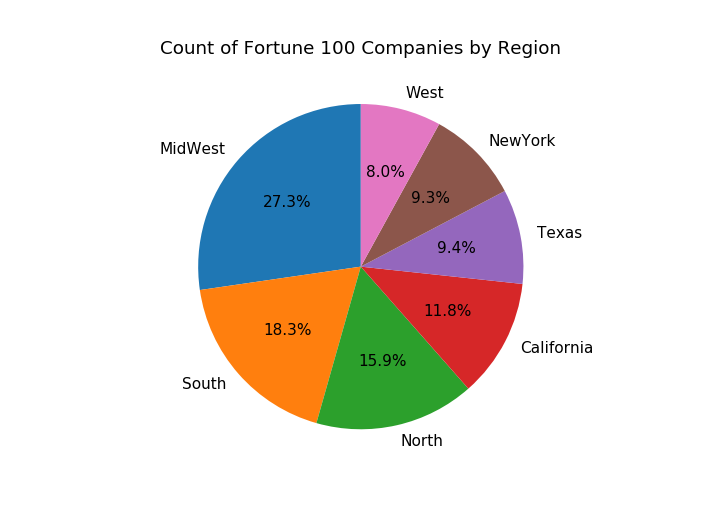

In [124]:
# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["MidWest", "South", "North", "California", "Texas", "NewYork", "West"]
plt.title("Count of Fortune 100 Companies by Region")

plt.pie(count_regions,  labels=labels, autopct="%1.1f%%", shadow=False, startangle=90,)

# Save Figure

plt.savefig("pie_regions_f1000.png")

# Sample - Homework - Show Figure
plt.show()